In [2]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Decision Tree

Also called the **Classification & Regression Tree**, because they can be used for both classification and regression modeling with data. In this lab we will learn to apply the decision-tree algorithm to some of the datasets we have encountered in the past.

Let us start with some utility functions that will help  us summarize and visualize the data.

#### Utility functions

In [24]:
from typing import List
from itertools import cycle
cycol = cycle('bgrcmk')

def scatterplot(index, data, ax) -> None:
    """
    A helper function to plot the 2-D data. 
    It presumes the features are 'x1' & 'x2'
    """
    ax.scatter(data['x'],   # as the x-axis 
            data['y'],   # as the y-axis
            s=100, # size
            alpha=0.5, #opacity/transparency
            c=next(cycol) # pick a different color
            )
    ax.set_xlabel (r"$x$", fontsize=25)
    ax.set_ylabel(r"$y$", fontsize=25)
    title =  f'Scatterplot of univariate-{index}'
    ax.set_title(title, fontsize=30)

def load_regression_datasets () -> List[pd.DataFrame]:
    datasets = []
    for i in range(1,4):
        file = f"https://raw.githubusercontent.com/supportvectors/ml-100/master/univariate-{i}.csv"
        data = pd.read_csv(file)
        data = data.dropna()
        datasets.append(data)
    return datasets

def display_data_summary(data:pd.DataFrame, index:int) -> None:
    display(HTML (f'<h4 style="text-align:center">DATASET: univariate-{index}</h4>'))
    html = data.describe(include='all').transpose().to_html()
    display(HTML(html))
    


#### Load, summarize & visualize the data.

In [4]:
from IPython.display import Markdown, HTML
datasets = load_regression_datasets()

for index, data in enumerate(datasets):
    display_data_summary(data, index)   

### Visualize the three datasets

Let us remind ourselves of these old friends from our previous labs through a quick visualization.

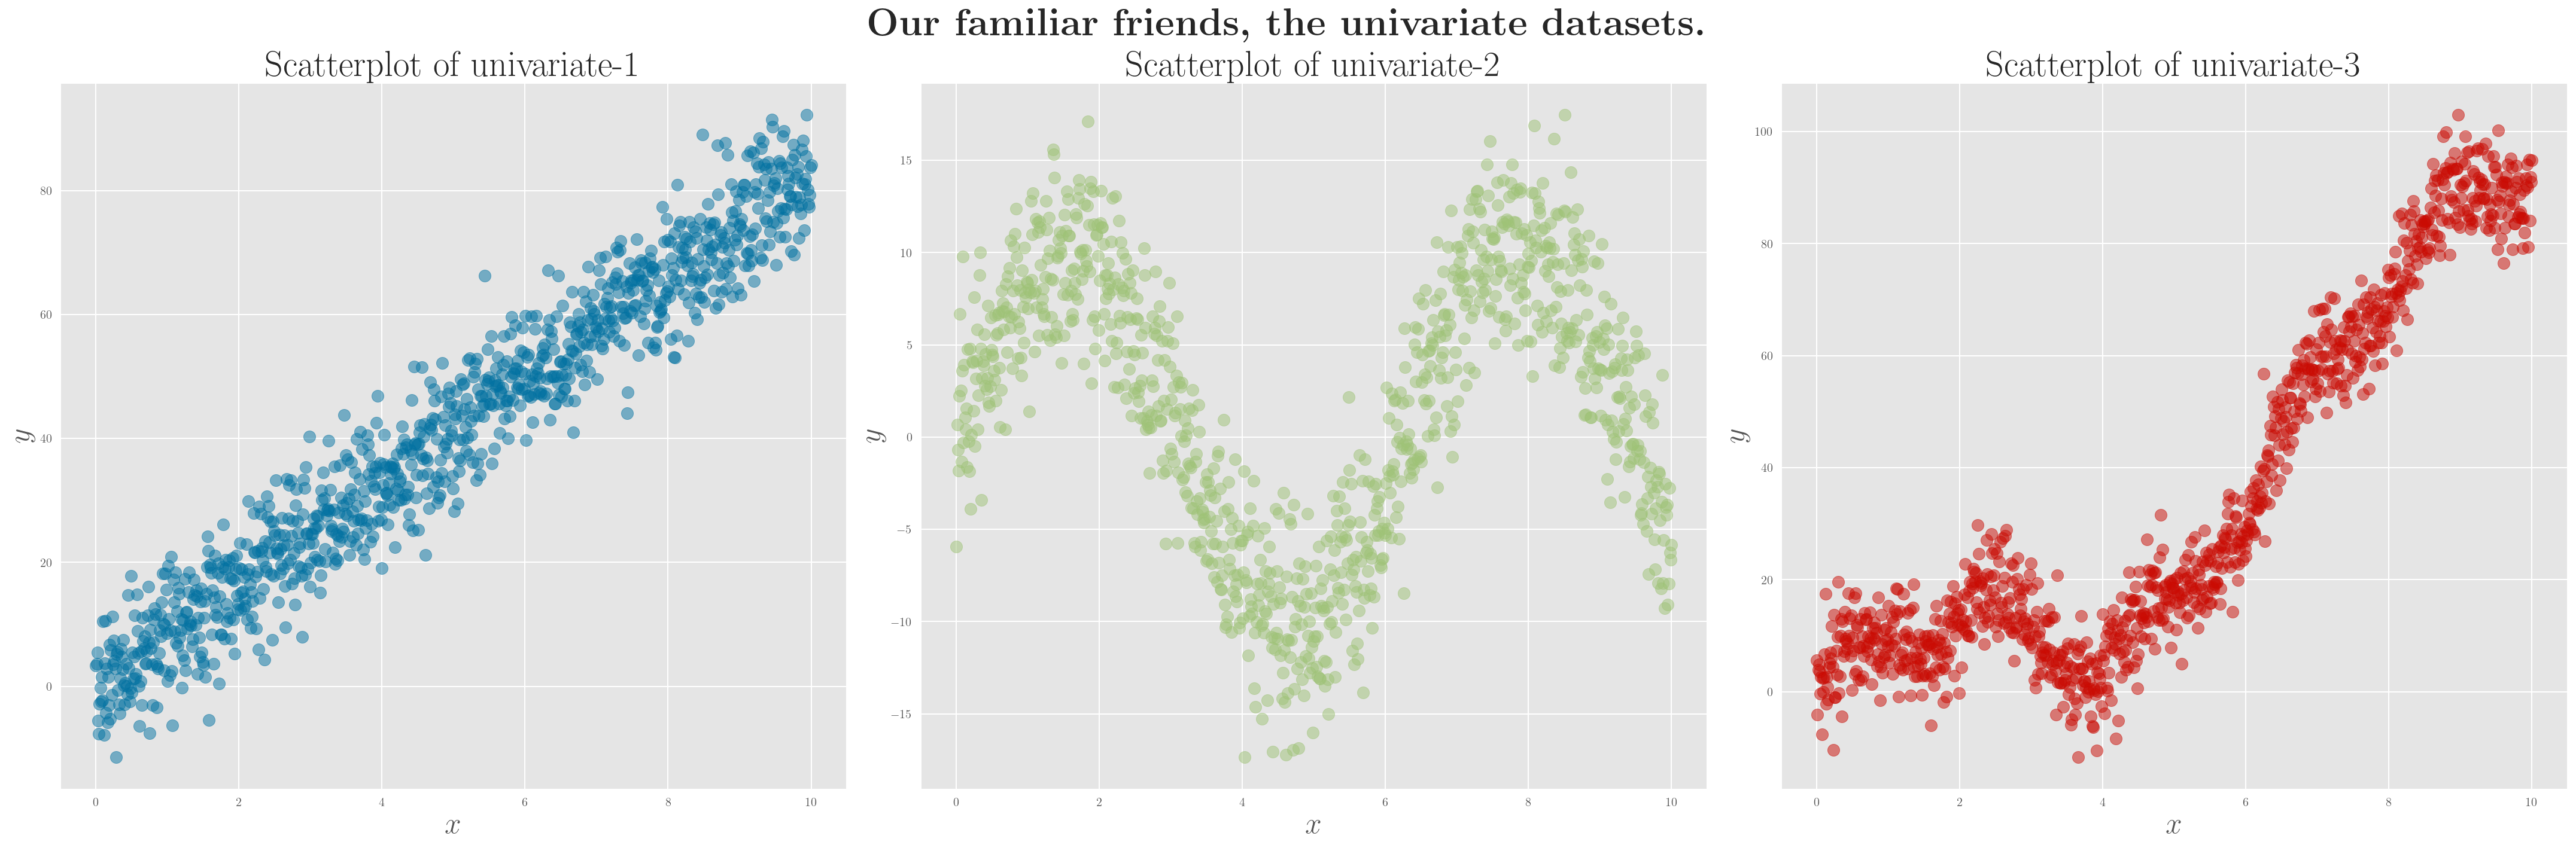

In [25]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
for i, data in enumerate(datasets):
    scatterplot (i+1, data, ax[i])

plt.suptitle(r'\textbf{Our familiar friends, the univariate datasets.}', fontsize=32)    
plt.tight_layout()

### Decision Tree Regressor

Let us now try the decision tree algorithm for creating a regressor.

Mean squared error: 70.49
Coefficient of Determination (R^2):0.8773


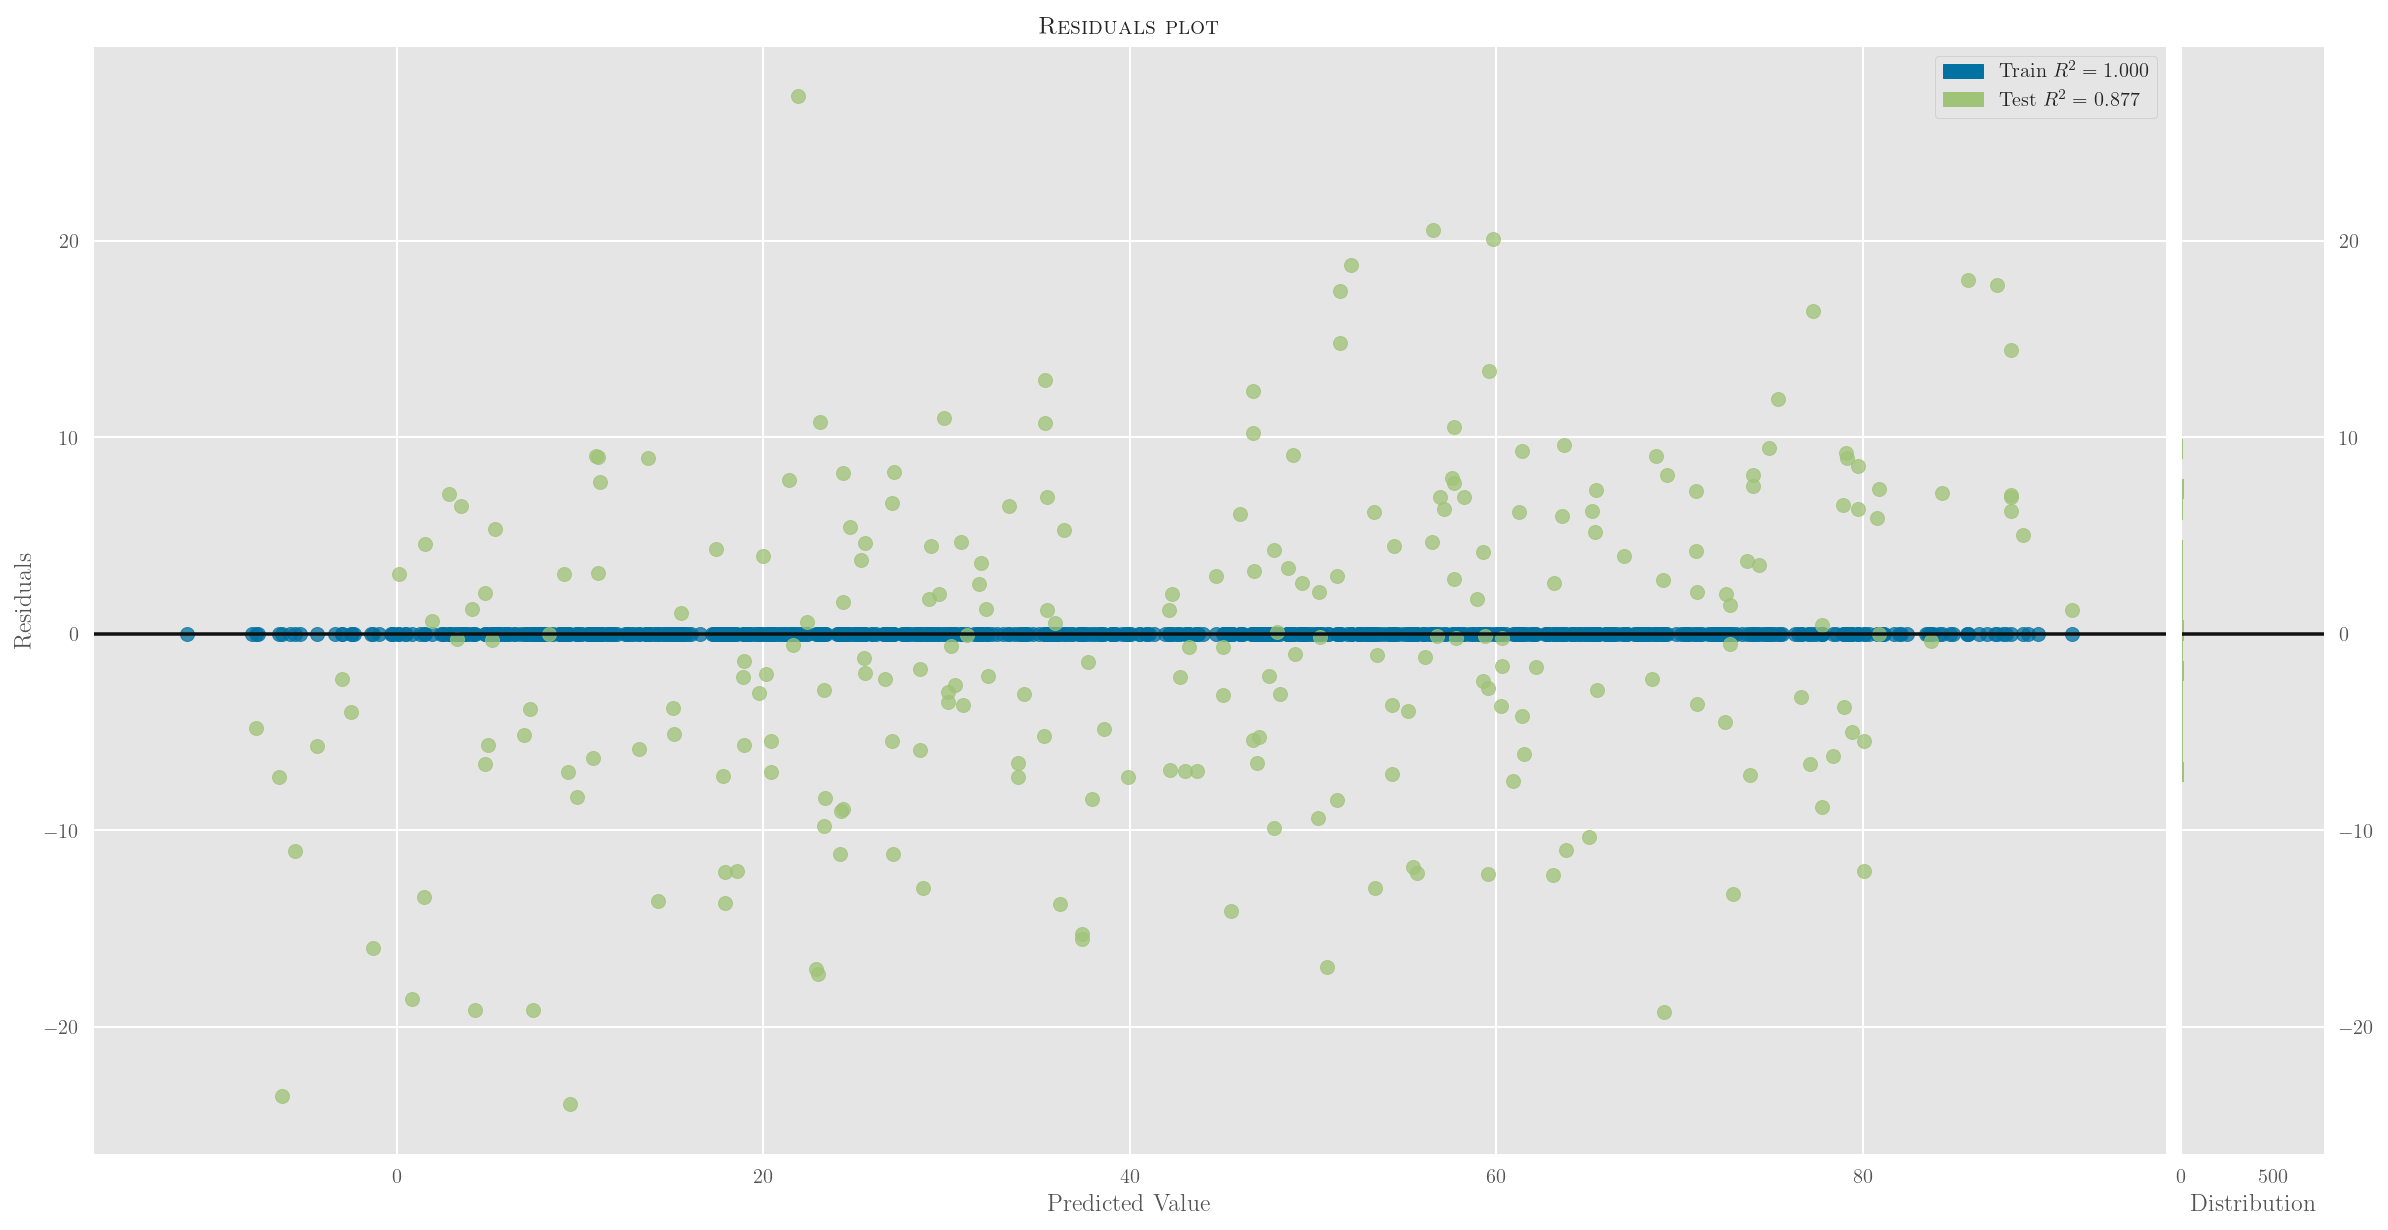

Mean squared error: 16.82
Coefficient of Determination (R^2):0.7005


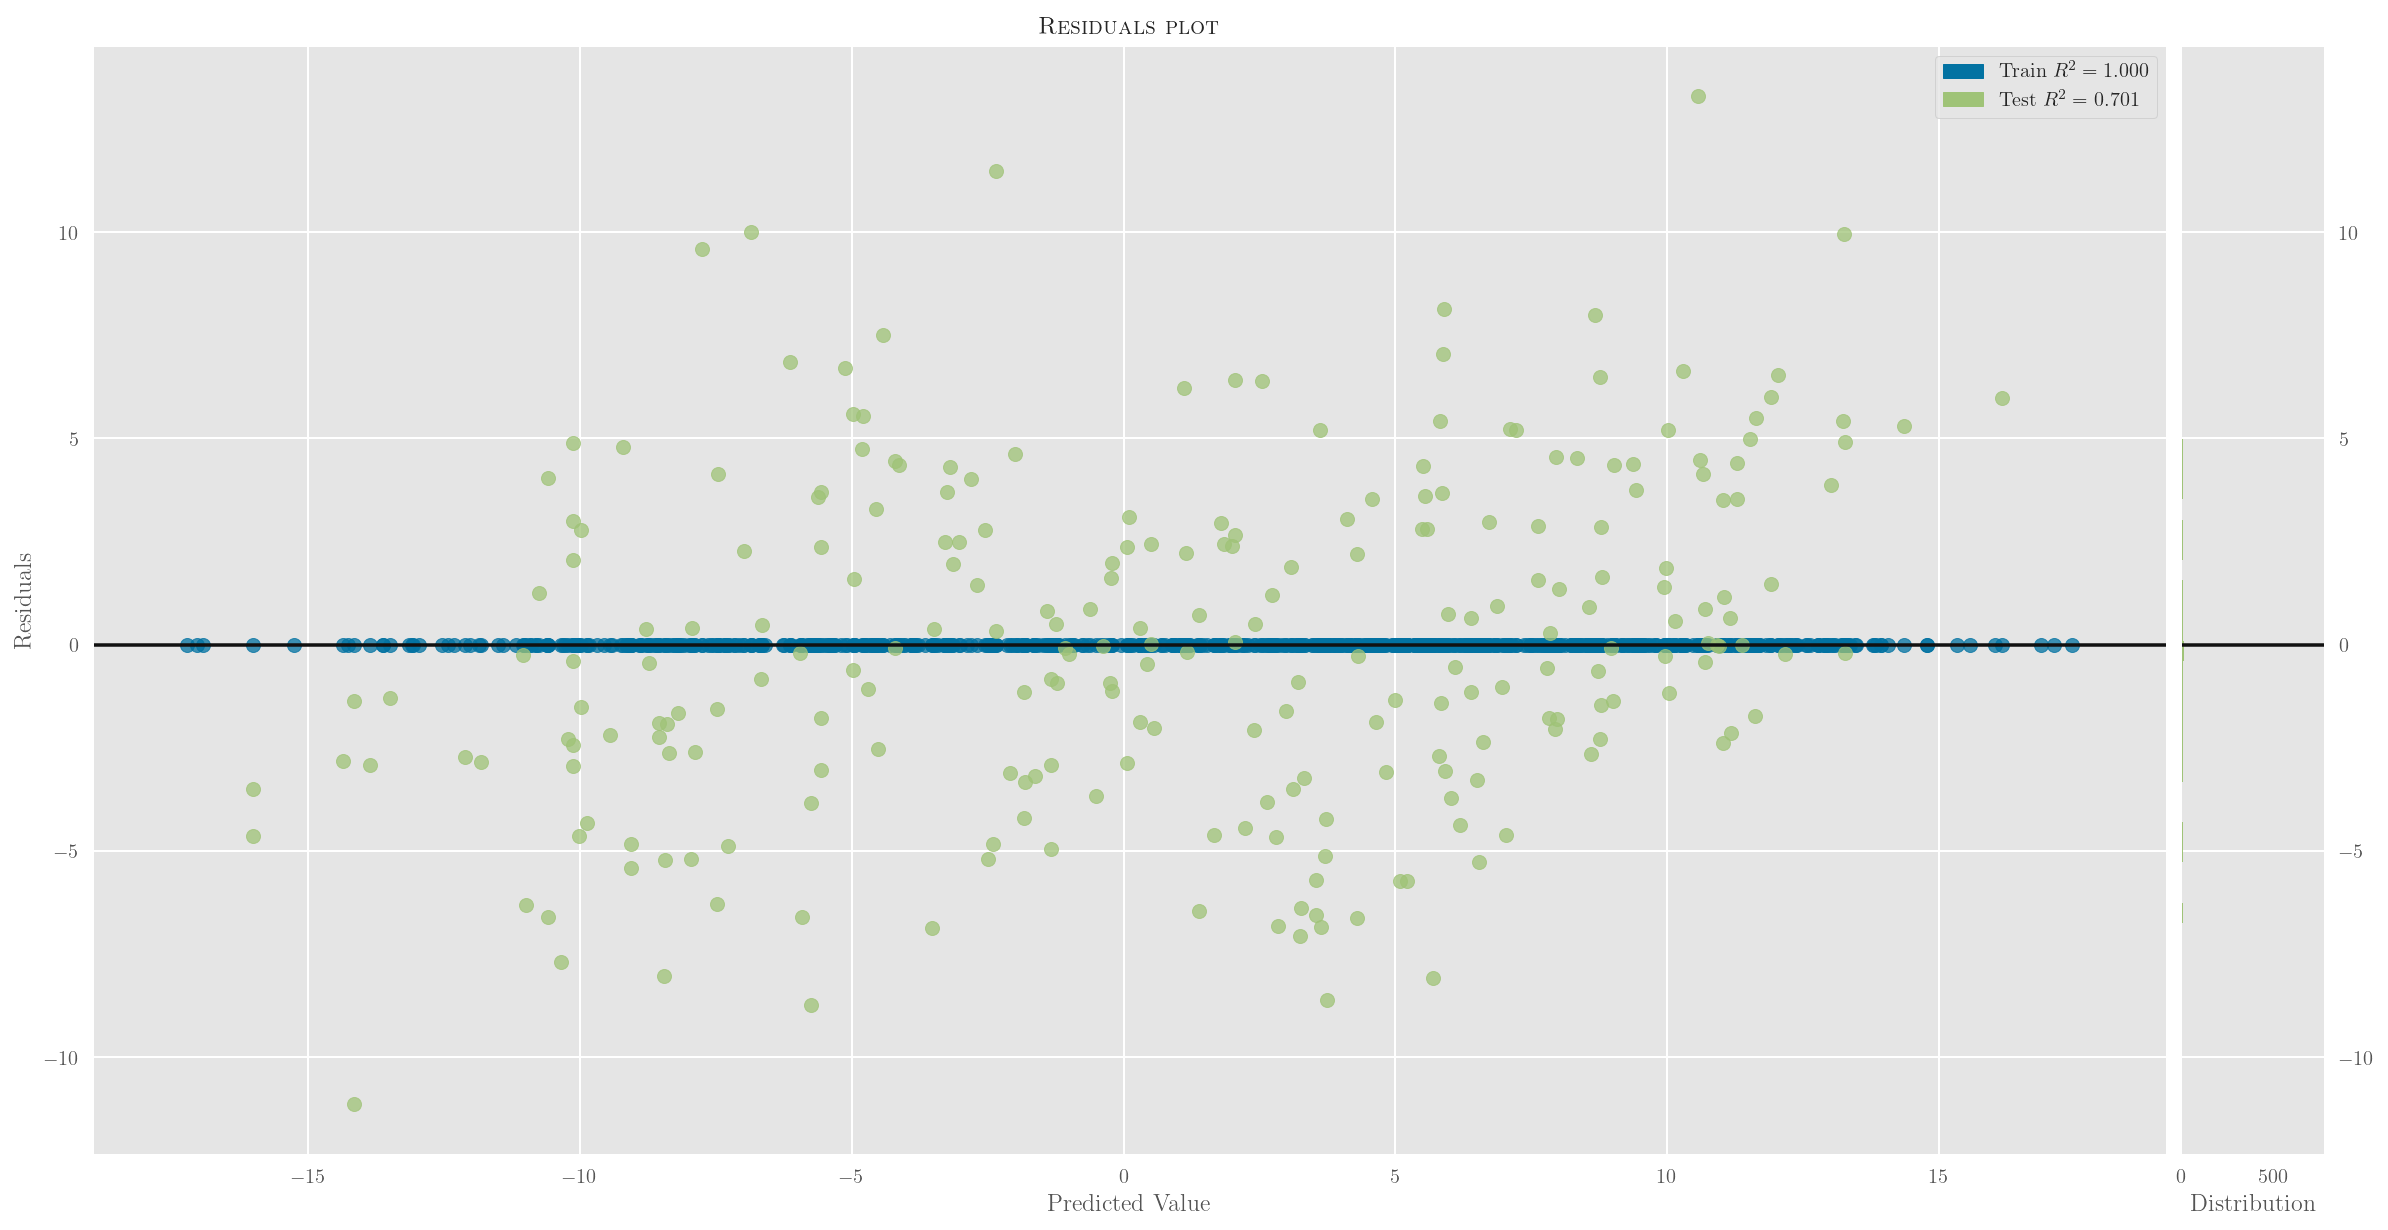

Mean squared error: 51.41
Coefficient of Determination (R^2):0.9489


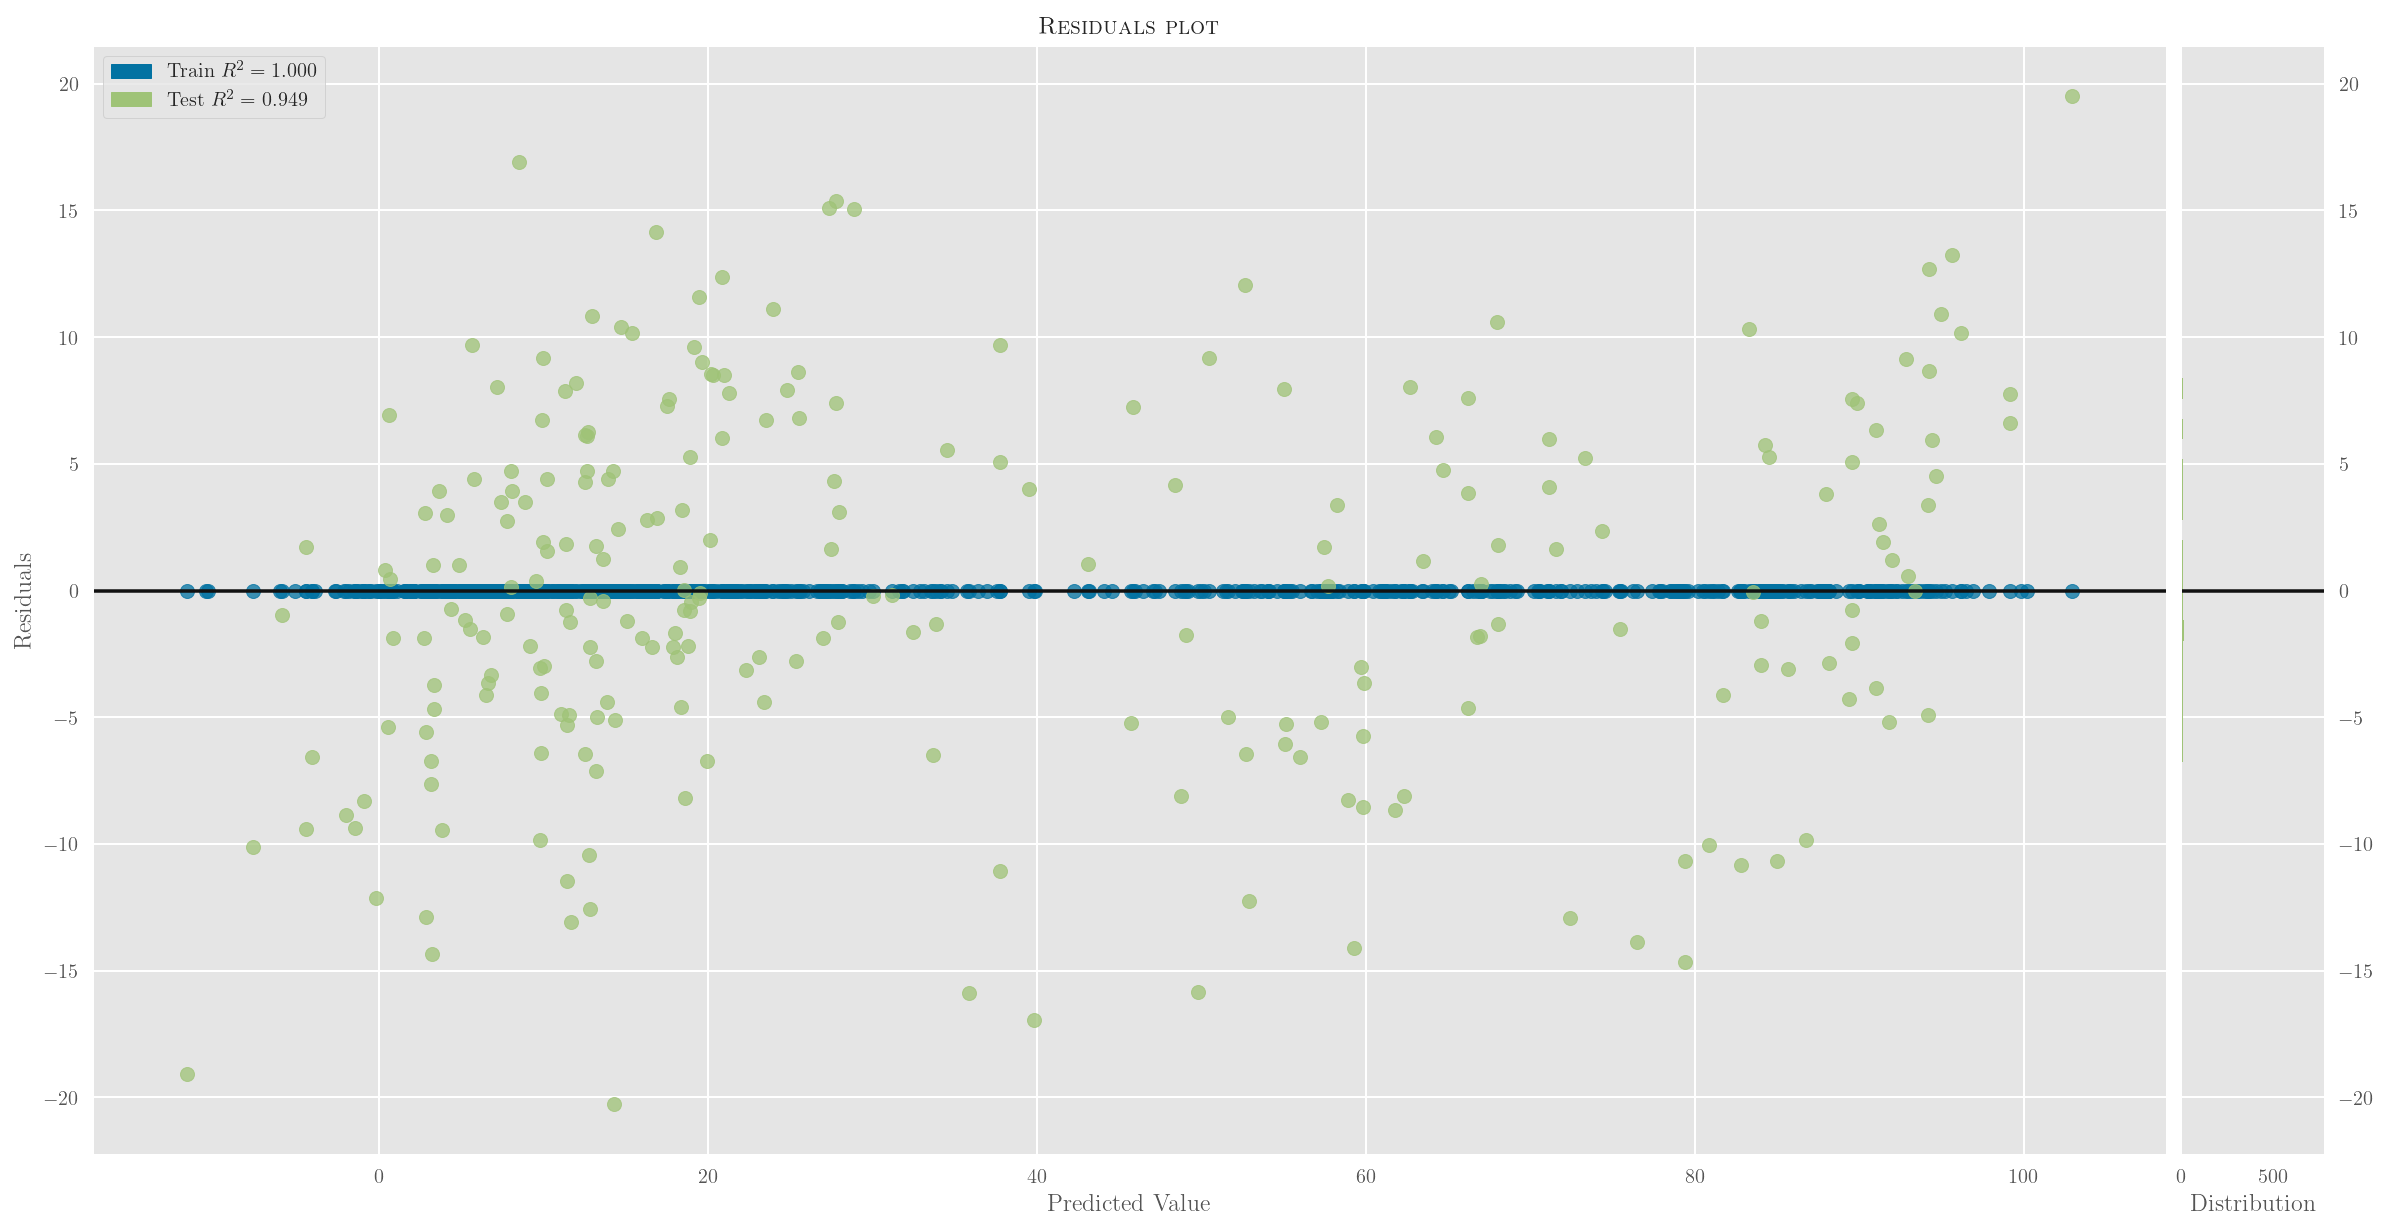

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz  
from yellowbrick.regressor import residuals_plot



trees = []
for index, data in enumerate(datasets):
    X, y = data[['x']], data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
    ŷ = tree.predict(X_test)
    name = f'Univariate-{index + 1}'
    trees.append(tree)
    
    
    display(HTML(f'<h4 style="text-align:center">Decision Tree for {name}</h4>'))
    # Check how good are the predictions?
    mse         = mean_squared_error(y_test, ŷ)
    print(f"Mean squared error: {mse:.2f}")
    r2 = r2_score(y_test, ŷ)
    print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
    
    plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
    viz = residuals_plot(tree, X_train, y_train, X_test, y_test, 
                         title=r'\textsc{\large Residuals plot}')

    

### Display the model predictions on the data

As the final step, let us display the model predictions to check for its fidelity in capturing the essential relationship of the features.

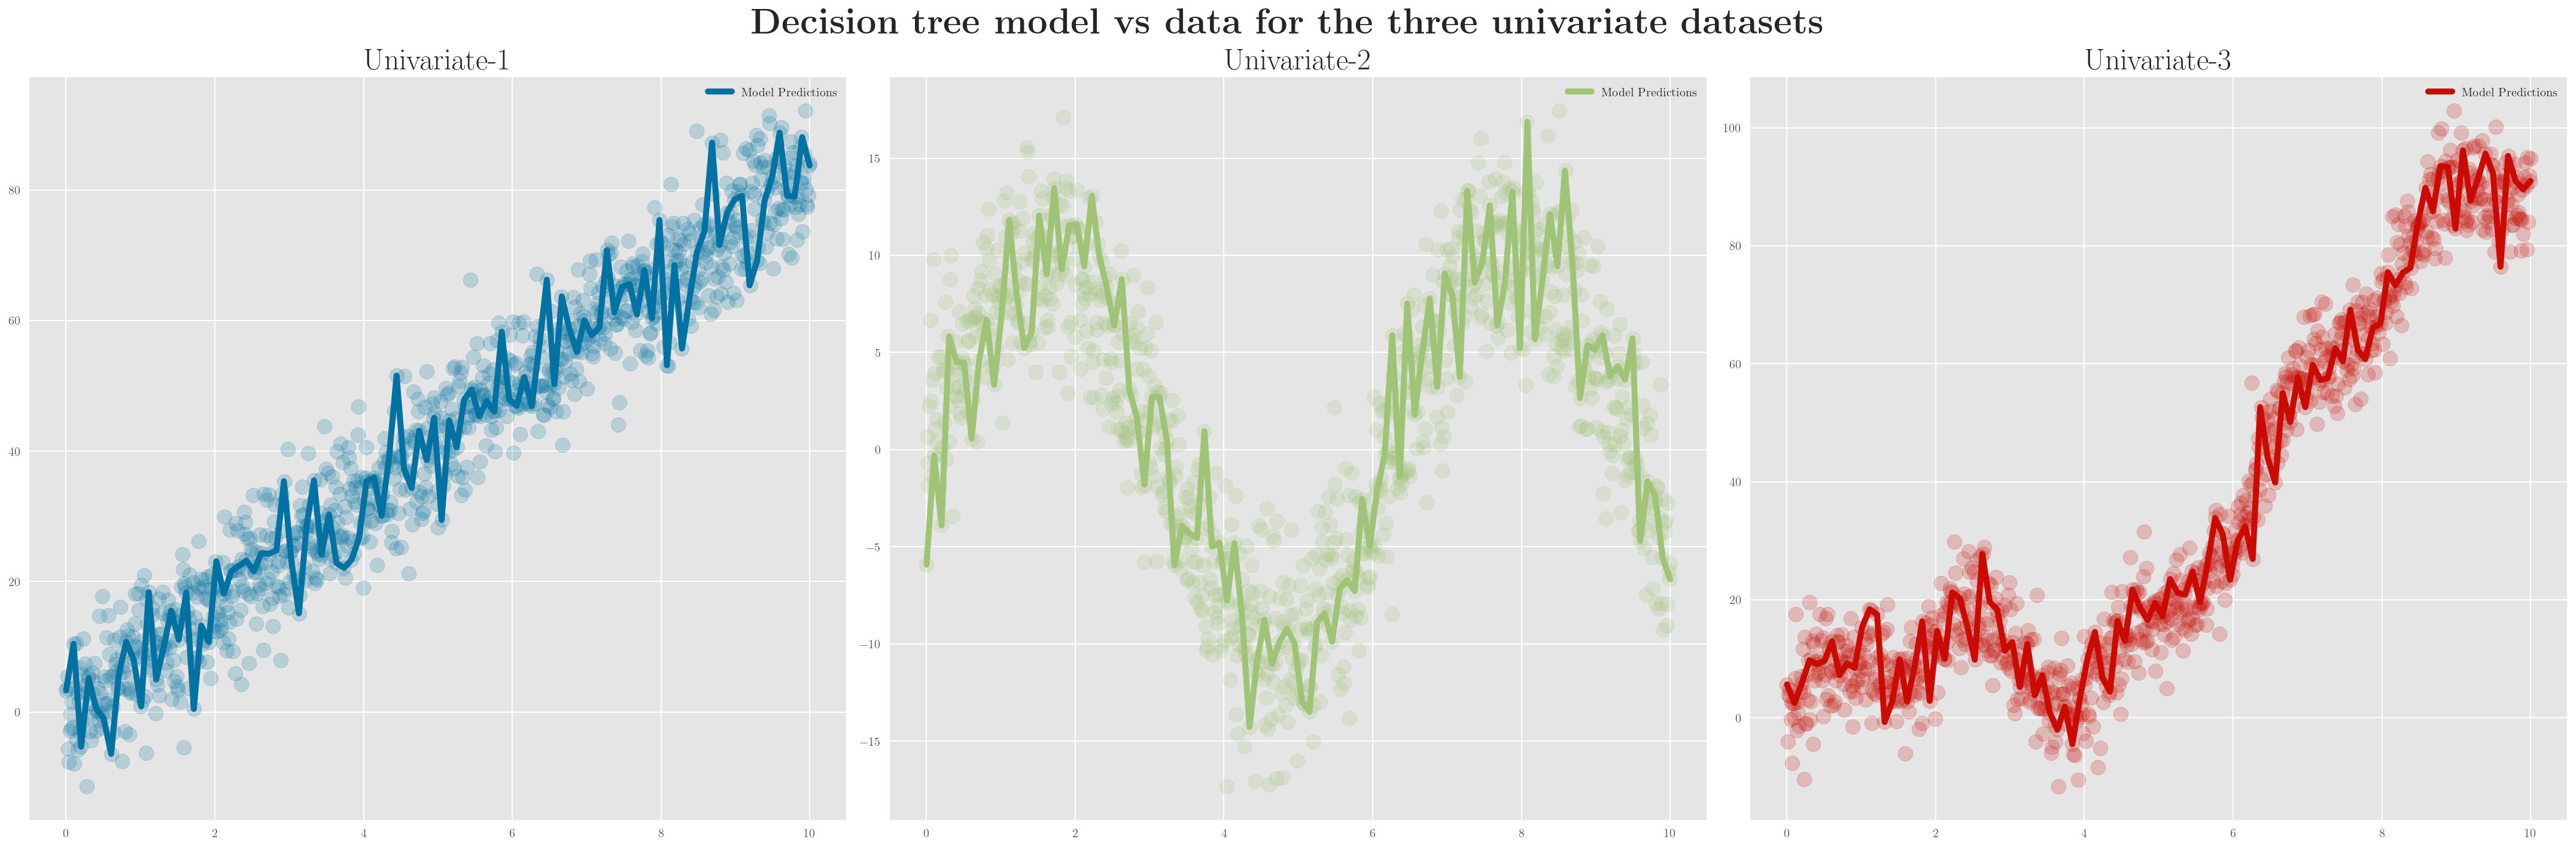

In [52]:
cycol = cycle('bgrcmk')
fig, ax = plt.subplots(1,3, figsize=(30,10))
for index, (data,tree) in enumerate(zip(datasets, trees)):
    xx = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 100)}) 
    yy = tree.predict(xx)
    color = next(cycol)
    ax[index].scatter(data['x'], data['y'], alpha=0.2, s=150, c=color)
    ax[index].plot(xx, yy , c=color, label="Model Predictions", linewidth=5)
    ax[index].legend(loc='best');
    ax[index].set_title(f'Univariate-{index+1}', fontsize=25)
plt.suptitle(r'\textbf{Decision tree model vs data for the three univariate datasets}', fontsize=30)
plt.tight_layout()

**Observation** Clearly, these trees are overfitting models for our situation.

### Plotting the decision trees

Let us now plot the three decision tree models.

**Caution**: This can take quite some time to render, so be patient!

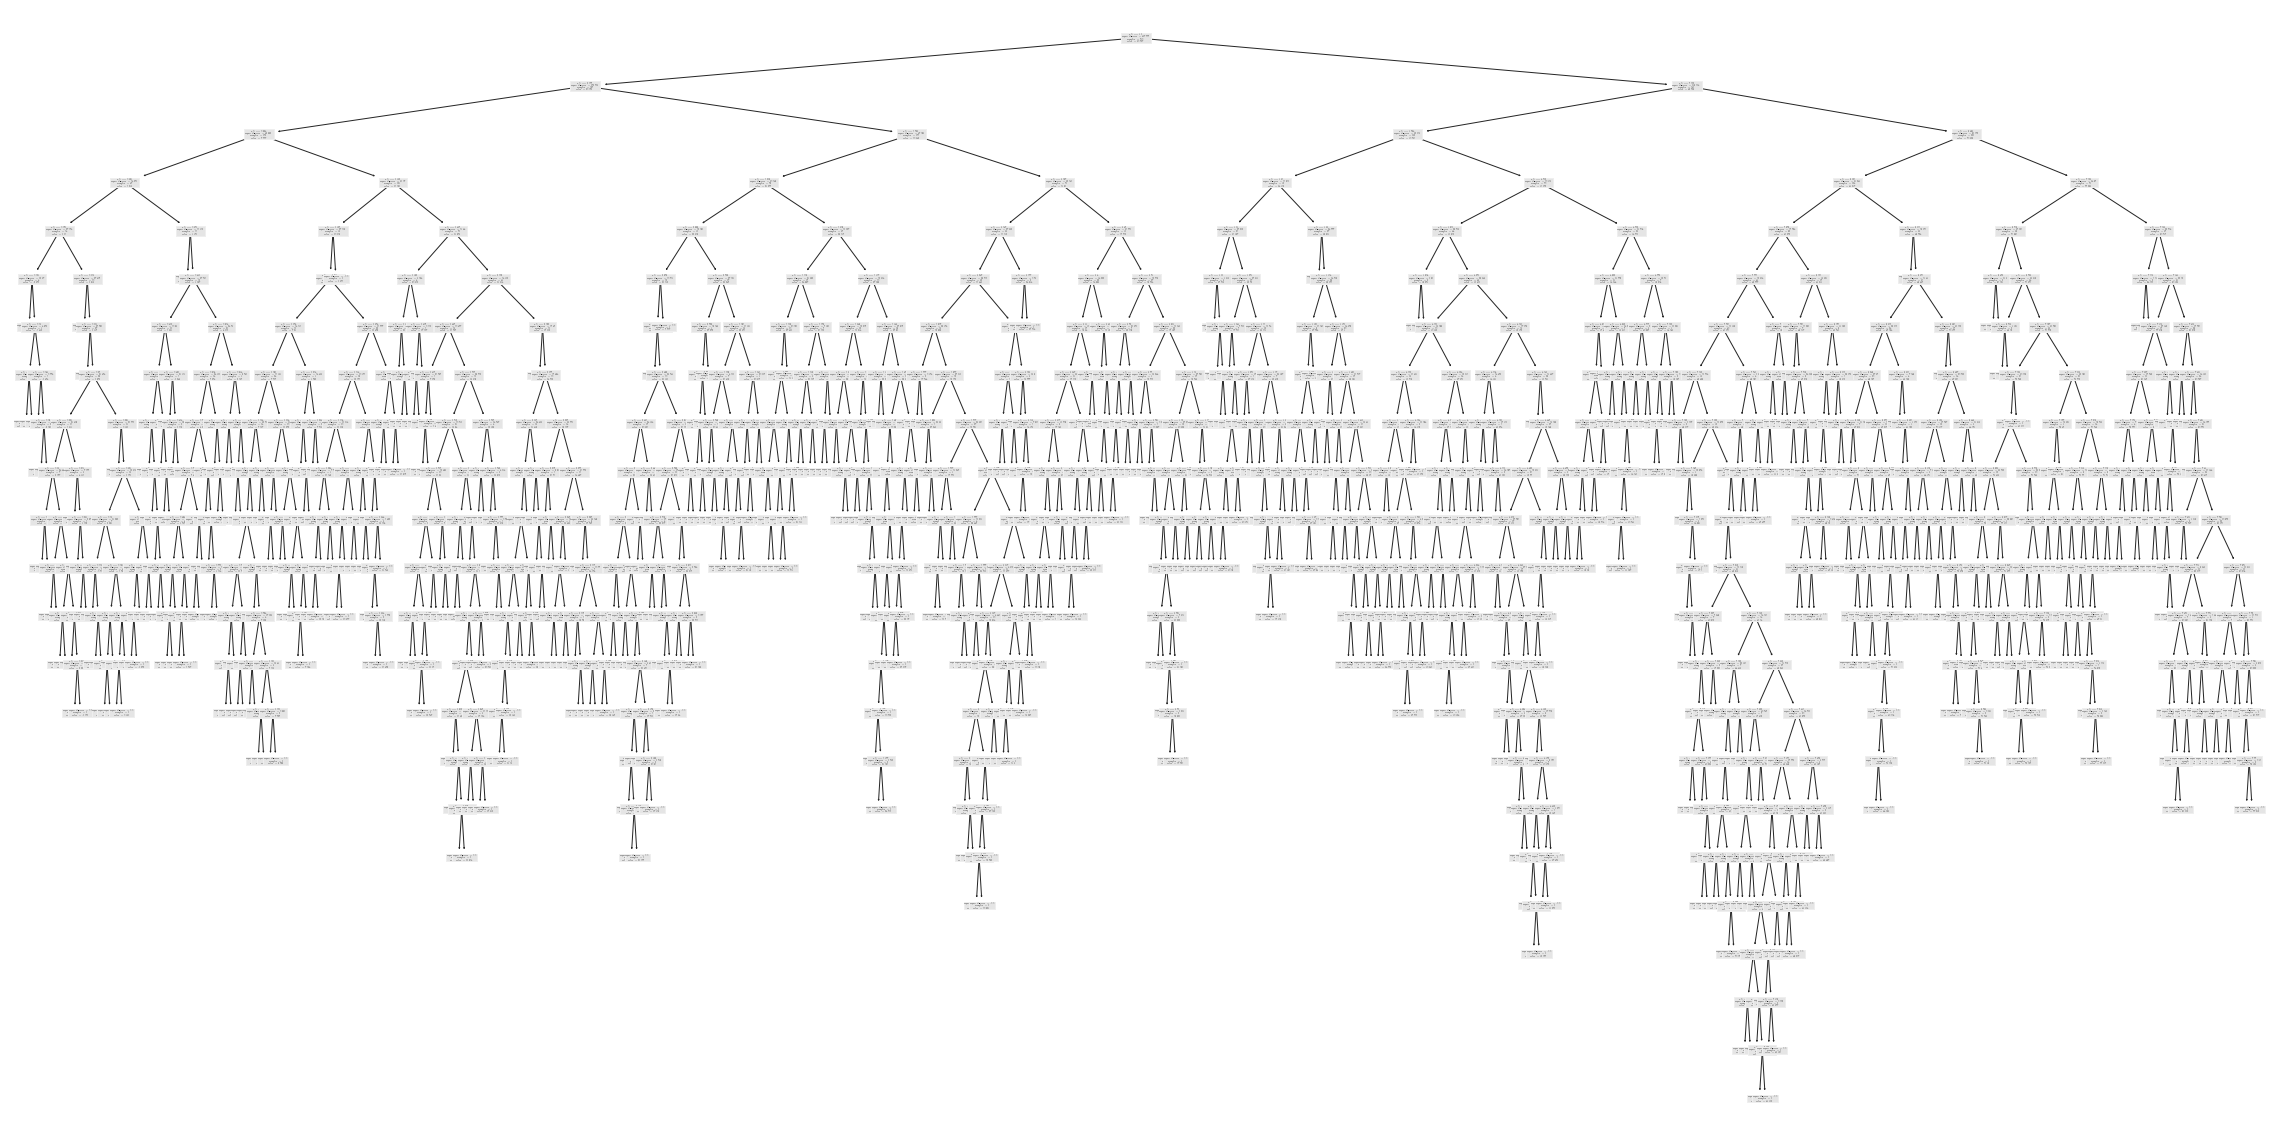

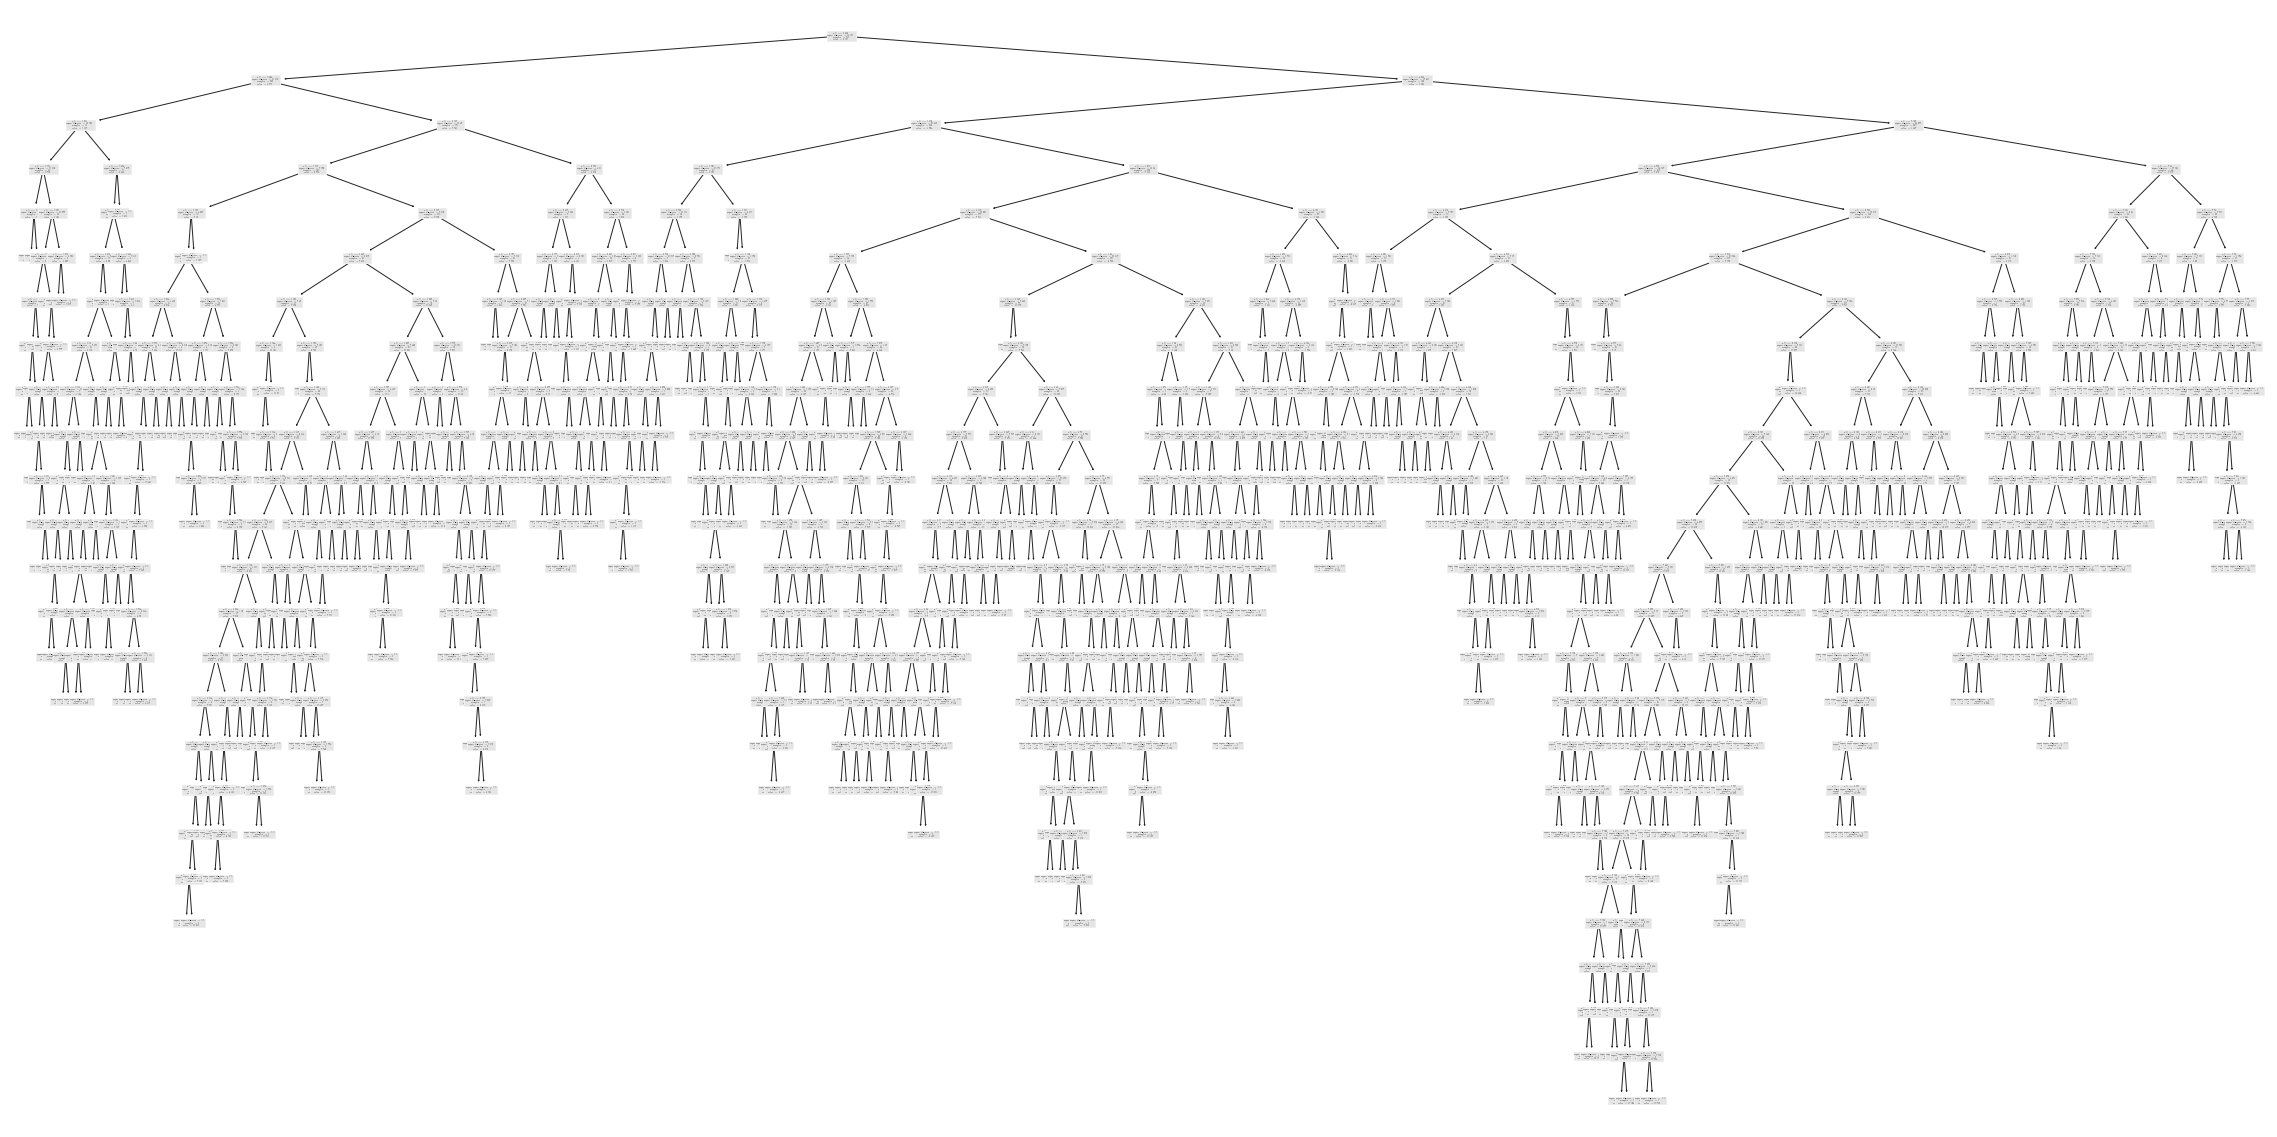

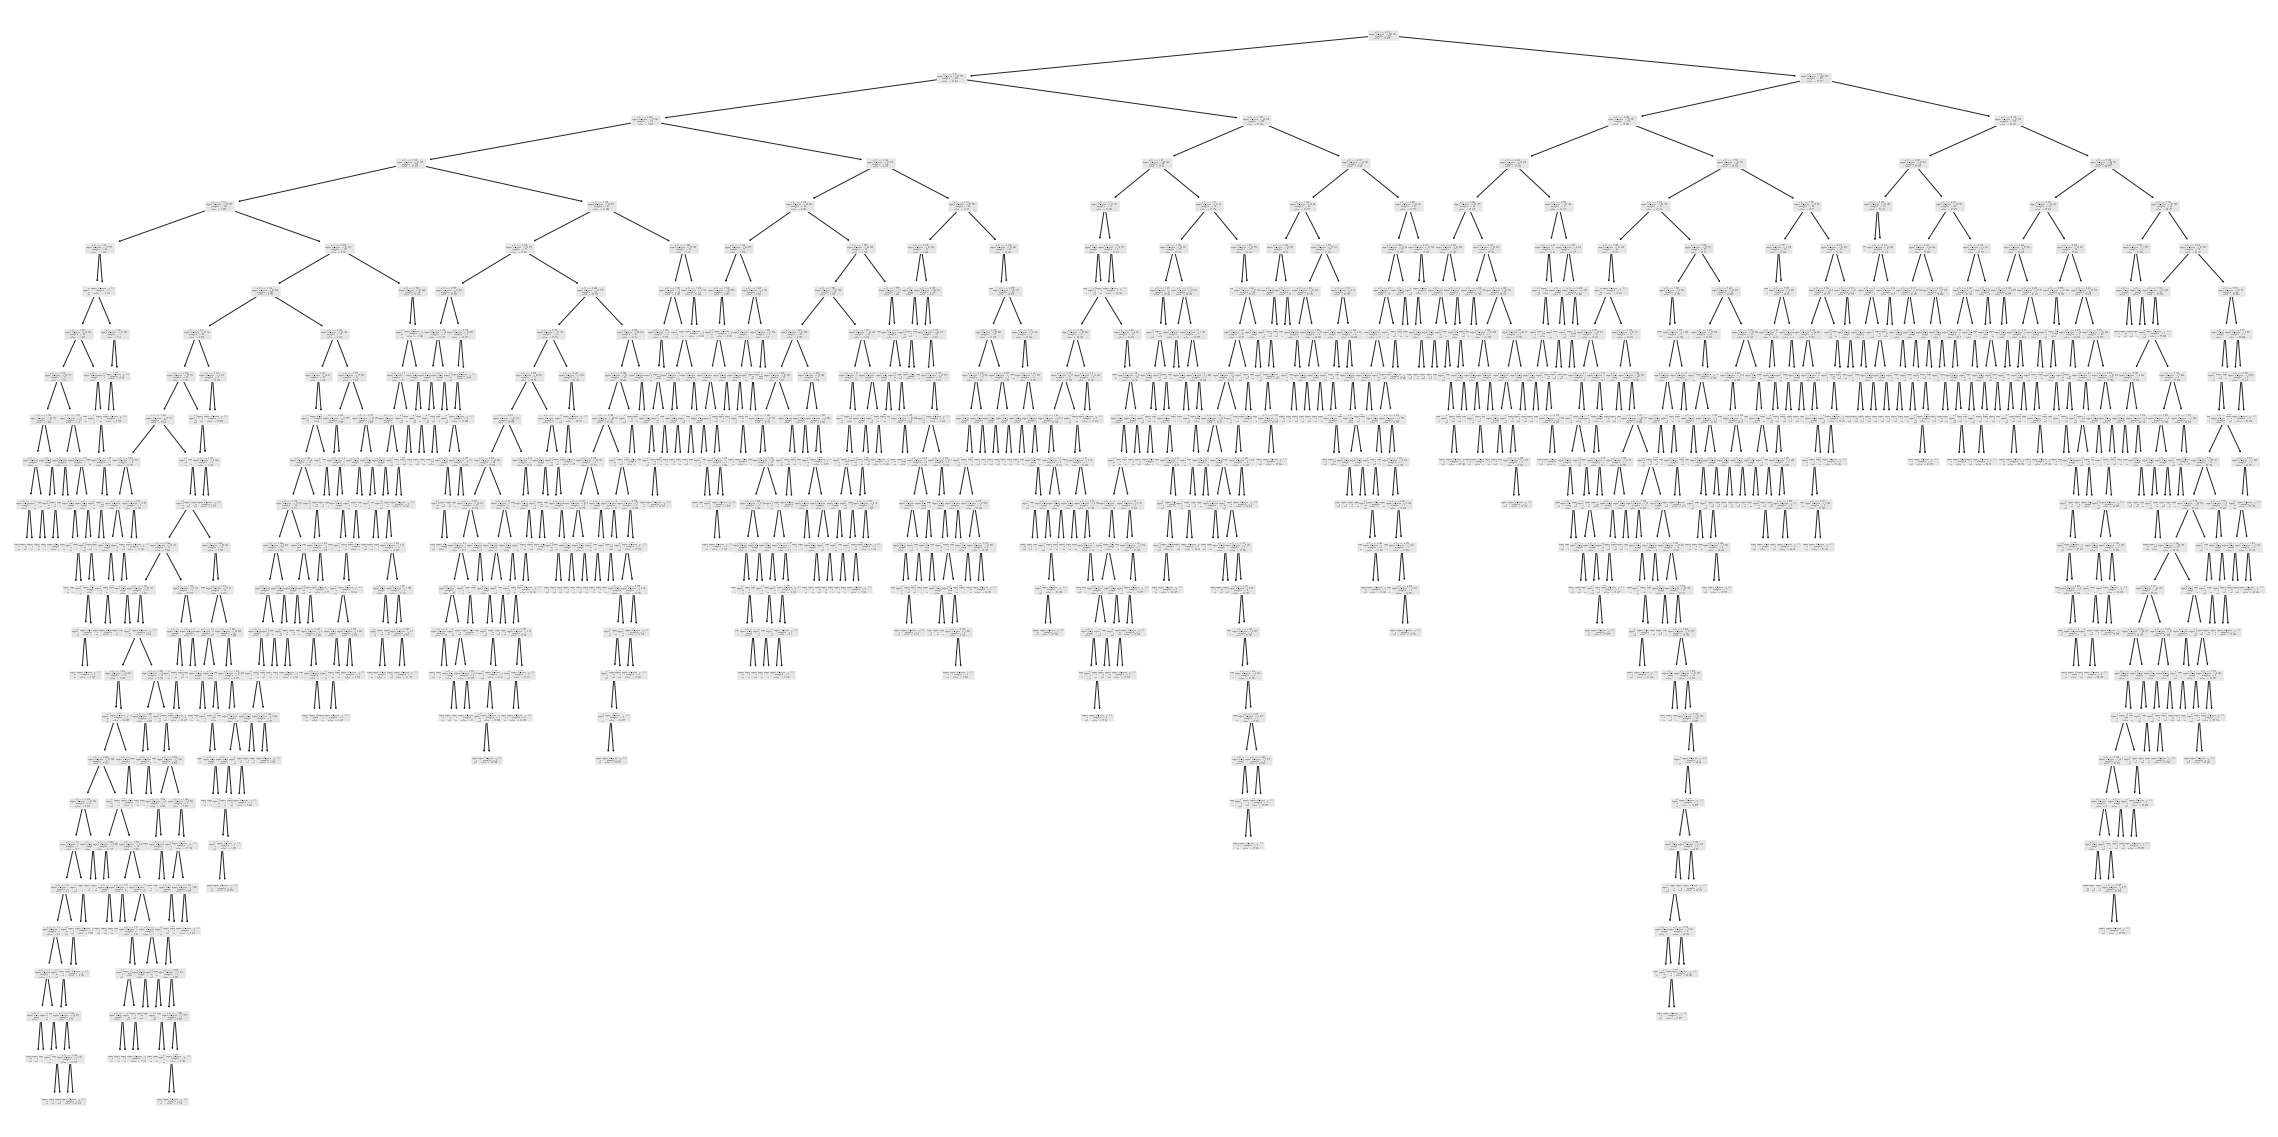

In [53]:
from sklearn.tree import plot_tree
for index, tree in enumerate(trees):
    name = f'Univariate-{index + 1}'
    display(HTML(f'<h4 style="text-align:center">Decision tree visualization for {name}</h4>'))
    plot_tree(tree);
    plt.show();
